In [2]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns

In [3]:
url='https://drive.google.com/file/d/1Ar4mJT7mb2KwGnoT9OwssmLhEKXwNZ6Z/view?usp=share_link'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df = pd.read_csv(csv_raw)
print(df.head())

  Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  RankSeason  \
0  ARI     NL  2012  734  688  81  0.328  0.418  0.259         0         NaN   
1  ATL     NL  2012  700  600  94  0.320  0.389  0.247         1         4.0   
2  BAL     AL  2012  712  705  93  0.311  0.417  0.247         1         5.0   
3  BOS     AL  2012  734  806  69  0.315  0.415  0.260         0         NaN   
4  CHC     NL  2012  613  759  61  0.302  0.378  0.240         0         NaN   

   RankPlayoffs    G   OOBP   OSLG  
0           NaN  162  0.317  0.415  
1           5.0  162  0.306  0.378  
2           4.0  162  0.315  0.403  
3           NaN  162  0.331  0.428  
4           NaN  162  0.335  0.424  


In [4]:
df.head(10)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NaN,NaN,162,0.319,0.405
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,0,NaN,NaN,162,0.336,0.430
8,COL,NL,2012,758,890,64,0.330,0.436,0.274,0,NaN,NaN,162,0.357,0.470
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402


In [5]:
#mean of rus scored
df.RS.mean()

715.0819805194806

In [6]:
df.loc[df.Team =='ARI'].RS.mean()

742.2

In [7]:
df.loc[(df.Team =='ARI') & (df.Year >2005)].RS.mean()

729.0

In [8]:
#runs allowed mean by CHC till 2007
df.loc[(df.Team =='CHC') & (df.Year <2007)].RA.mean()

728.170731707317

In [9]:
df.loc[(df.Team == 'BAL') &(df.Year <2000)].W.median()

89.5

In [10]:
df.loc[df.Year == 2010].OBP.mode()

0    0.332
Name: OBP, dtype: float64

In [11]:
#correlation
df_corr=df[['RS','RA','W']]
df_corr.head()

,RS,RA,W
0,734,688,81
1,700,600,94
2,712,705,93
3,734,806,69
4,613,759,61


In [12]:
df_corr.corr()

,RS,RA,W
RS,1.000000,0.380139,0.511745
RA,0.380139,1.000000,-0.532394
W,0.511745,-0.532394,1.000000


<Axes: >

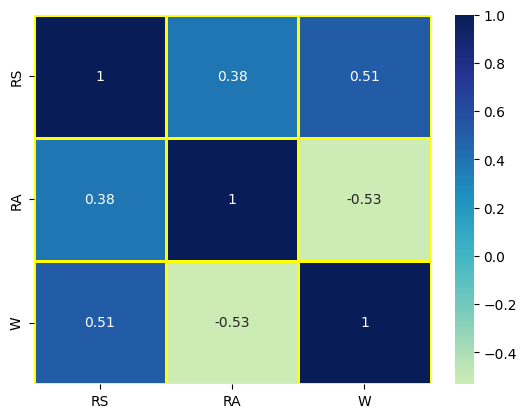

In [13]:
#heatmap
sns.heatmap(data = df_corr.corr(),
           annot=True,
           fmt='.2g',
           cmap='YlGnBu',
           center=0,
           linewidths=2,
           linecolor='Yellow',
           cbar = True) 

In [15]:
import pandas as pd
import requests
from io import StringIO
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [16]:
url='https://drive.google.com/file/d/1N3cEW0harBtAiVVdmEVa72ER2R9fQvt1/view?usp=share_link'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df1 = pd.read_csv(csv_raw)
print(df1.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [17]:
df1.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: ylabel='Density'>

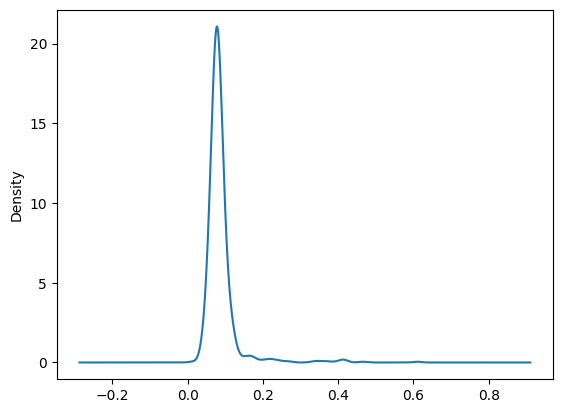

In [18]:
#density distribution
df1.chlorides.plot.density()

In [19]:
#68-95-99 check and how many withi 3 standard deviation
df1.loc[(df1.chlorides <= df1.chlorides.mean() + df1.chlorides.std()) &
       (df1.chlorides >= df1.chlorides.mean() - df1.chlorides.std())].chlorides.count()/df1.chlorides.count()

0.9480925578486554

In [20]:
#Shapiro-Wilks for normality
stat, p = st.shapiro(df1.chlorides)
print(p)
if p >0.05:
        print('Sample Gaussian, failed to reject')
else:
    print('Nope Gaussian, reject')

0.0
Nope Gaussian, reject


In [21]:
#standard error
st.sem(df1.alcohol)

0.026650018979018173

In [22]:
df1.alcohol.std() / m.sqrt(df1.alcohol.count())

0.026650018979018173

In [23]:
#confidence interval of mean of citric acid
print(df1[['citric acid']].mean())
st.norm.interval(alpha = 0.95,
                loc = df1[['citric acid']].mean(),
                scale=st.sem(df1[['citric acid']]))

citric acid    0.270976
dtype: float64


TypeError: rv_generic.interval() missing 1 required positional argument: 'confidence'

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

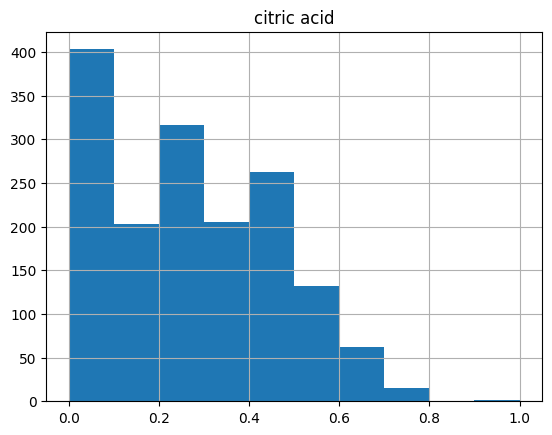

In [24]:
#histogram
df1[['citric acid']].hist()

In [25]:
#T-test
url='https://drive.google.com/file/d/1ivOLMc87jr0QwE8FWnPdxptt0KIvQdQY/view?usp=share_link'
file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df2 = pd.read_csv(csv_raw)
print(df2.head())

          Country         Salary  YearsCodedJob  OpenSource  Hobby  \
0  United Kingdom  100000.000000             20           0      1   
1   United States  130000.000000             20           1      1   
2   United States  175000.000000             16           0      1   
3         Germany   64516.129030              4           0      0   
4           India    6636.323594              1           0      1   

   CompanySizeNumber      Remote  CareerSatisfaction  Data_scientist  \
0               5000      Remote                   8               0   
1               1000      Remote                   9               0   
2              10000  Not remote                   7               0   
3               1000  Not remote                   9               0   
4               5000  Not remote                   5               0   

   Database_administrator  ...  Developer_with_stats_math_background  DevOps  \
0                       0  ...                                    

In [26]:
df2.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df2.columns.tolist()

['Country',
 'Salary',
 'YearsCodedJob',
 'OpenSource',
 'Hobby',
 'CompanySizeNumber',
 'Remote',
 'CareerSatisfaction',
 'Data_scientist',
 'Database_administrator',
 'Desktop_applications_developer',
 'Developer_with_stats_math_background',
 'DevOps',
 'Embedded_developer',
 'Graphic_designer',
 'Graphics_programming',
 'Machine_learning_specialist',
 'Mobile_developer',
 'Quality_assurance_engineer',
 'Systems_administrator',
 'Web_developer']

In [28]:
#subset
salary_uk = df2.loc[df2.Country == 'United Kingdom'].Salary
salary_de = df2.loc[df2.Country == 'Germany'].Salary

In [29]:
#t test
stat, p =st.ttest_ind(a = salary_uk, b = salary_de)
print(p)
if p>0.05 :
    print('Both coumtries have similar salaries,, fail to reject H0')
else:
    print('There is a difference in salaries(reject H0)')

0.026389999555203502
There is a difference in salaries(reject H0)


In [30]:
#cross tabulation
tab = pd.crosstab(index = df2.Country,
                 columns = df2.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [31]:
#chi-square test
chi2, p, dof, expected = st.chi2_contingency(tab)
print(p)
if p>0.05 :
    print('There is no relationship,, fail ot reject H0') #H0 is null hypothesis
else:
    print('There is strong relationship,, reject H0')

3.3211208773012153e-16
There is strong relationship,, reject H0


In [32]:
#Linear Regression
url='https://drive.google.com/file/d/1Da19DQrD6iE-iruQ4zTorVEuJ5LuOqWH/view?usp=share_link'
file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df3 = pd.read_csv(csv_raw)
print(df3.head())

   Unnamed: 0  carat colour clarity certification  price
0           1   0.30      D     VS2           GIA   1302
1           2   0.30      E     VS1           GIA   1510
2           3   0.30      G    VVS1           GIA   1510
3           4   0.30      G     VS1           GIA   1260
4           5   0.31      D     VS1           GIA   1641


In [33]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
df3.head(5)

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


In [35]:
#isolate X and Y
Y = df3.price
X = df3.carat

In [36]:
#adding constant
X = sm.add_constant(X)
X.head(2)

,const,carat
0,1.0,0.3
1,1.0,0.3


In [37]:
model1 = sm.OLS(endog=Y, exog=X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          3.04e-150
Time:                        23:24:37   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

Text(0, 0.5, 'Price')

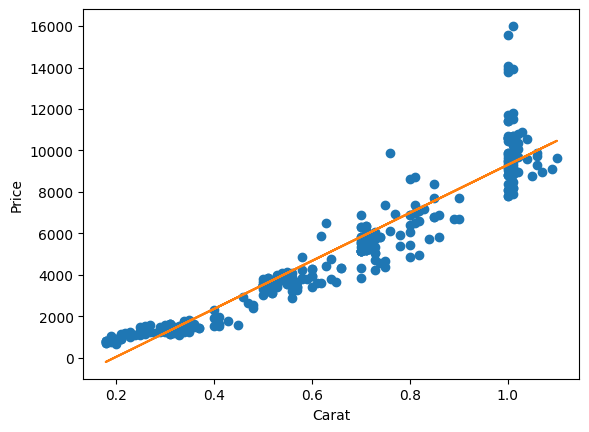

In [38]:
#plotting
X = df3.carat
plt.plot(X, Y, 'o')
b, a = np.polyfit(X, Y, 1)
plt.plot(X, b*X + a)
plt.xlabel("Carat")
plt.ylabel("Price")

In [39]:
#LR with dummy variable
df3.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [40]:
#create binary variable
df3["carat_binary"] = np.where(df3.carat > 0.6, 1, 0)
df3.head(3)

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.3,D,VS2,GIA,1302,0
1,2,0.3,E,VS1,GIA,1510,0
2,3,0.3,G,VVS1,GIA,1510,0


In [41]:
y = df3.price
X = df3.carat_binary

In [42]:
X = sm.add_constant(X)

In [43]:
model2 = sm.OLS(endog=y , exog=X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           1.79e-73
Time:                        23:24:48   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

Text(0, 0.5, 'Price')

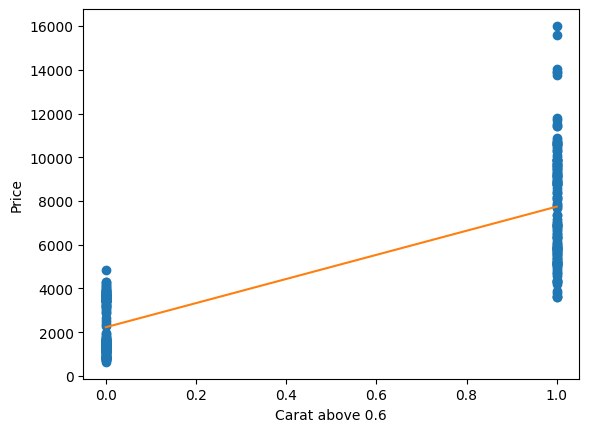

In [44]:
X = df3.carat_binary
plt.plot(X , y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b*X +a)
plt.xlabel("Carat above 0.6")
plt.ylabel("Price")